This notebook will look at the ellipses and the phase at the CODAR region.

In [125]:
import os
import datetime
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import csv
import pandas as pd
import subprocess as sp
from subprocess import Popen, PIPE


import netCDF4 as nc
from salishsea_tools import viz_tools

%matplotlib inline

In [3]:
thalweg = np.loadtxt('/data/dlatorne/MEOPAR/tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)
grid = '/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
fB = nc.Dataset(grid)
bathy = fB.variables['Bathymetry'][:]
lons = fB.variables['nav_lon'][:]
lats = fB.variables['nav_lat'][:]

In [41]:
jmin = 379; jmax = 461; imin = 238; imax=321 
j = np.arange(jmin,jmax)
i = np.arange(imin,imax)

In [131]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 7)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

count = np.arange(0,16)
params_av = np.zeros((898,398,8))
q = 1
for x in i:
    for y in j:
        runname1 = '{}_{}_CODAR_{}_{}_surface(0-2m)'.format(t_o, t_f, x, y)
        f ='/ocean/mdunn/MEOPAR/analysis/Muriel/TidalEllipseData/CODAR/'+runname1+'.csv'
        if os.path.isfile(f)==True:
            df2 = pd.read_csv('/ocean/mdunn/MEOPAR/analysis/Muriel/TidalEllipseData/CODAR/'+runname1+'.csv', index_col=False)
            params_av[y, x,:] = df2.as_matrix()
            q = q+1
print q

75


In [132]:
params_av = np.ma.masked_values(params_av,0)

red is clockwise


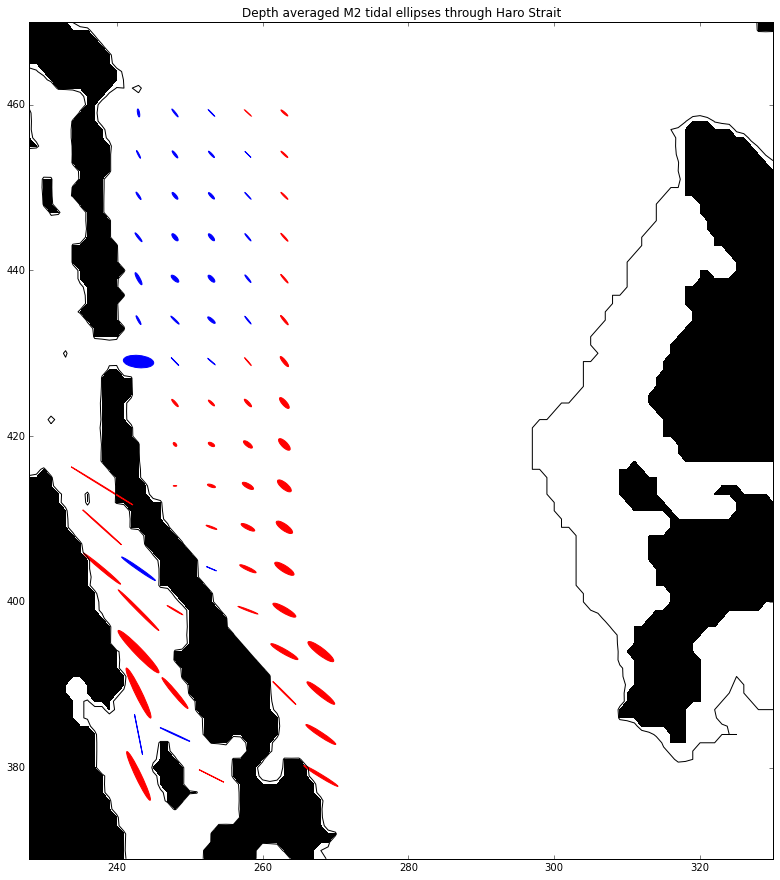

In [133]:
phi=0
fig = plt.figure(figsize=(20,15))
k = np.zeros((898,398)); m = np.zeros((898,398))
ax = fig.add_subplot(111)
viz_tools.set_aspect(ax) 
ex = 10
scale = 10

for q in np.arange(jmin-ex,jmax+ex):
    for l in np.arange(imin-ex,imax+ex):
        k[q,l] = q*np.cos(phi*np.pi/180.)+l*np.sin(phi*np.pi/180.)
        m[q,l] = -q*np.sin(phi*np.pi/180.)+l*np.cos(phi*np.pi/180.) 

for x in i:
    for y in j:
        if params_av[y,x,1] > 0:
            thec = 'b'
        else:
            thec = 'r'
        ellsc = Ellipse(xy=(m[y,x],k[y,x]), width=scale*params_av[y,x,0], 
                            height=scale*params_av[y,x,1], angle=params_av[y,x,2],
                            color=thec)
        ax.add_artist(ellsc)
        ellsc.set_facecolor(thec)

    # y-axis in k, but labelled in latitude
#ax.set_ylim(375,425)
#slope = (lats[jmax,imax]-lats[jmin,imin])/(k[jmax,imax]-k[jmin,imin])
#mylist = (k[jmax,imax]+(np.arange(48.335, 48.58, 0.05)-
##labels = ['48.5','48.55', '48.6', '48.65', '48.7', '48.75']
#ax.set_yticks(mylist)
#ax.set_yticklabels(labels)
#ax.set_ylabel('Latitude (degrees N)')
# x-axis in m, but labelled in longitude
#ax.set_xlim(30,80)
#slope = (lons[jmax,imax]-lons[jmin,imin])/(m[jmax,imax]-m[jmin,imin])
#mylist = (m[jmax,imax]+(np.arange(-123.4,-123,0.1)-
#                        lons[jmin,imin])/slope).tolist()
#labels = ['123.4','123.3', '123.2', '123.1', '123']
#ax.set_xticks(mylist)
#ax.set_xticklabels(labels)
#ax.set_xlabel('Longitude (degrees W)')

# land, and 5 m contour
contour_interval = [-0.01, 0.01]
ax.contourf(m[jmin-ex:jmax+ex,imin-ex:imax+ex],k[jmin-ex:jmax+ex,imin-ex:imax+ex],
        bathy.data[jmin-ex:jmax+ex,imin-ex:imax+ex],contour_interval,colors='black')
ax.contour(m[jmin-ex:jmax+ex,imin-ex:imax+ex],k[jmin-ex:jmax+ex,imin-ex:imax+ex],
            bathy.data[jmin-ex:jmax+ex,imin-ex:imax+ex],[5],colors='black')
ax.set_title('Depth averaged M2 tidal ellipses through Haro Strait')

print "red is clockwise"

In [141]:

fig, ax = plt.subplots(1,1, figsize=(15,15))
cdict = {'red':   [(0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'blue':  [(0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)]}

blue_red1 = LinearSegmentedColormap(cdict, plt.cm.jet)

mesh = ax.pcolormesh(params_av[jmin:jmax,imin:imax,3], cmap=blue_red1)
fig.colorbar(mesh)

<matplotlib.colorbar.Colorbar instance at 0x7f28646ea1b8>

TypeError: 'LinearSegmentedColormap' object has no attribute '__getitem__'